<div style="text-align: center;"><span style="font-size: 50px;">Machine Learning and Optimization Assignment 2 </span></div>

<font color = 'red' ><b>Question 1:
This assignment is a scenario-based assignment which uses Titanic Dataset and consists of 3  
                 
different questions. Read and understand the requirements and answer the questions carefully.

Dataset: Titanic disaster.   
Problem Statement:   
You are provided with the datasets about people from the Titanic disaster. Use the dataset    
resolve the following issues:
</font></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color = 'Green' >**Find the total number of survivors from the 3rd PClass (Titanic_train.csv)**</font>

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Survived, Length: 891, dtype: int64

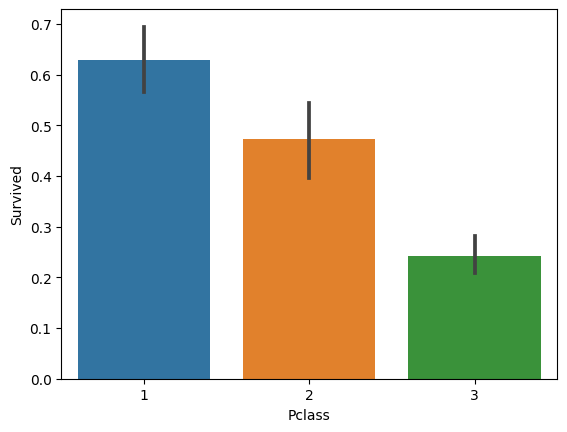

In [3]:
p=data[['Survived','Pclass']] #select the columns
sns.barplot(x='Pclass', y='Survived', data=p) #plot the barplot
# replace the values of the survived column where 1 is dead and 0 is survived after replacing the values 1 is survived and 0 is dead
p['Survived'].replace({1:0,0:1})

In [4]:

table = pd.crosstab(p['Survived'],p['Pclass']) #create the table of the data survived and pclass
print (table) #print the table

survived_filter = (data['Survived'] == 1) & (data['Pclass'] == 3)
survived_values = data.loc[survived_filter, 'Survived'].value_counts()
print('hence the total number of survivors from the 3rd PClass are ',survived_values[1])

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
hence the total number of survivors from the 3rd PClass are  119


<font color = 'Green' >**Q_2 . Find the total number of male who died in the accident (Titanic_train.csv)**</font>

In [5]:
table2=pd.crosstab(data['Survived'],data['Sex']) 
print(table2)

survived_filter = (data['Survived'] == 0) & (data['Sex'] == 'male')
survived_values = data.loc[survived_filter, 'Survived'].value_counts()
print('hence the total number of male who died in the accident are ',survived_values[0])

Sex       female  male
Survived              
0             81   468
1            233   109
hence the total number of male who died in the accident are  468


<AxesSubplot: xlabel='Sex', ylabel='Survived'>

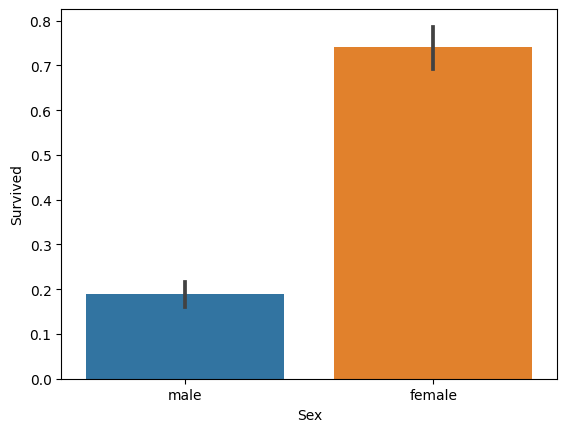

In [6]:
sns.barplot(x='Sex', y='Survived', data=data)

<font color = 'Green' >**Q_3 .Find the total number of the survivor who embarked the ship from "Southampton"**</font>


In [7]:
table3=pd.crosstab(data['Survived'],data['Embarked']) 
print(table3)

survived_filter = (data['Survived'] == 1) & (data['Embarked'] == 'S')
survived_values = data.loc[survived_filter, 'Survived'].value_counts()
print('hence the total number of the survivor who embarked the ship from "Southampton" is',survived_values[1])

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
hence the total number of the survivor who embarked the ship from "Southampton" is 217


<font color = 'Green' >**Question 2 Dataset: Titanic disaster     
Q: Some of the values in the "Age" column are missing. Use Linear Regression model to fill the missing values in the dataset.    
(Hint: Dependent Variable(Age)) to fill(predict) the missing values.**</font>

<font color = 'Green' >**1. Print the total number of cells having missing values in the Age column.**</font>

In [8]:
# calculating missing values in age column
print('Total no. of missing value in Age is ',data['Age'].isnull().sum())


Total no. of missing value in Age is  177


<font color = 'Green' >**2. Print the sum of the index number of all the cells with missing values.**</font>

In [9]:
# finding the index of the missing values in age column
Age_null_index =data[data['Age'].isnull()].index

sum = 0
for i in Age_null_index:
    sum = sum + i

print('sum of the indexes where Age is Null ',sum)

sum of the indexes where Age is Null  76921


<font color = 'Green' >**3. Print the mean of all the new values filled using linear regression. [For this first divide the training dataset into two halves, first half will contain only those rows which have missing values in 'Age' Column(let us say this dataframe (df1), and the second half will contain the rows where you have valid numbers in 'Age' column(let us say this dataframe (df2)). Now we will train our model with df2 and predict the ages on the dataframe df1. Whatever age value we got for the df1 we will calculate the mean of it.]**</font>

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# create a copy of the DataFrame
df = data.copy()

# coverting sex to numeric values 0 for male and 1 for female and saving the values in a new column
sex_map = {'male': 0, 'female': 1}
df['GenderLabel'] = df['Sex'].map(sex_map)


# split the DataFrame into two parts: one with null values and one without
df_with_null = df[df.isnull().any(axis=1)]
df_without_null = df.dropna()

# use linear regression to predict the null values based on the non-null values
model = LinearRegression()
model.fit(df_without_null[['Pclass','Survived','GenderLabel']], df_without_null['Age'])
predicted_values = model.predict(df_with_null[['Pclass','Survived','GenderLabel']])

# fill the null values with the predicted values
df.loc[df.isnull().any(axis=1), 'Age'] = predicted_values

# fill the null values with the predicted values in df_with_null
df_with_null.loc[:, 'Age'] = predicted_values

#calculating the missing values in age column
df['Age'].isnull().sum()

# showing the 'Pclass','Survived','GenderLabel' 'Age' columns with 10 rows
df[['Pclass','Survived','GenderLabel','Age']].head(10)


,Pclass,Survived,GenderLabel,Age
0,3,0,0,24.528566
1,1,1,1,38.000000
2,3,1,1,15.168438
3,1,1,1,35.000000
4,3,0,0,24.528566
5,3,0,0,24.528566
6,1,0,0,54.000000
7,3,0,0,24.528566
8,3,1,1,15.168438
9,2,1,1,24.673051


In [11]:
# showing the 'Pclass','Survived','GenderLabel' 'Age' columns with 10 rows from top
df[['Pclass','Survived','GenderLabel','Age']].head(10)

,Pclass,Survived,GenderLabel,Age
0,3,0,0,24.528566
1,1,1,1,38.000000
2,3,1,1,15.168438
3,1,1,1,35.000000
4,3,0,0,24.528566
5,3,0,0,24.528566
6,1,0,0,54.000000
7,3,0,0,24.528566
8,3,1,1,15.168438
9,2,1,1,24.673051


In [12]:
# showing the 'Pclass','Survived','GenderLabel' 'Age' columns with 10 rows from bottom
df[['Pclass','Survived','GenderLabel','Age']].tail(10)

,Pclass,Survived,GenderLabel,Age
881,3,0,0,24.528566
882,3,0,1,23.243963
883,2,0,0,34.033180
884,3,0,0,24.528566
885,3,0,1,23.243963
886,2,0,0,34.033180
887,1,1,1,19.000000
888,3,0,1,23.243963
889,1,1,0,26.000000
890,3,0,0,24.528566


In [13]:
# mean of the age column in df_with_null
print('The mean of all the new values filled in age is ', round(df_with_null['Age'].mean(),2))

The mean of all the new values filled in age is  25.45


<font color = 'Green' >**Question 3  Dataset: Titanic disaster.    
After performing the analysis from the previous question, derive a new column called    
“AdultOrChild” having categorical values as “Adult” or “Child” derived from Age column**   </font>  

In [14]:
data = df.copy()

In [15]:
# adding a new column 'AdultOrChild' to the DataFrame and assigning the values 
data['AdultOrChild'] = 'Child'
data.loc[data['Age'] >= 18, 'AdultOrChild'] = 'Adult'

# showing the 'Pclass','Survived','GenderLabel','Age','AdultOrChild' columns with 10 rows
data[['Pclass','Survived','GenderLabel','Age','AdultOrChild']].head(10)

,Pclass,Survived,GenderLabel,Age,AdultOrChild
0,3,0,0,24.528566,Adult
1,1,1,1,38.000000,Adult
2,3,1,1,15.168438,Child
3,1,1,1,35.000000,Adult
4,3,0,0,24.528566,Adult
5,3,0,0,24.528566,Adult
6,1,0,0,54.000000,Adult
7,3,0,0,24.528566,Adult
8,3,1,1,15.168438,Child
9,2,1,1,24.673051,Adult


In [16]:
table = pd.crosstab(data['Survived'],data['AdultOrChild']) #create the table of the data survived and pclass
print (table) #print the table
# where 1 is dead and 0 is survived

AdultOrChild  Adult  Child
Survived                  
0               547      2
1               211    131


In [17]:
# total number of children who survived
Child_filter = (data['Survived'] == 0) & (data['AdultOrChild'] == 'Child')
Child_values = data.loc[Child_filter, 'Survived'].value_counts()
print('hence the total number of children who survived are ',Child_values[0])

# total number of Adult who survived
Adult_filter = (data['Survived'] == 0) & (data['AdultOrChild'] == 'Adult')
Adult_values = data.loc[Adult_filter, 'Survived'].value_counts()
print('hence the total number of Adult who survived are ',Adult_values[0])

# Total number of people who survived
print('Total number of people who survived are ',Child_values[0]+Adult_values[0])

hence the total number of children who survived are  2
hence the total number of Adult who survived are  547
Total number of people who survived are  549


<font color = 'Green' >**2. Consider below features to create a Classification model and predict the survived category     
 Pclass     
 Age      
 Sex (Encode values using LabelEncoder)    
For the above prediction create a Confusion matrix for the model built by you and print the sum of all the elements of a matrix**</font> 

In [18]:
# creating classifcation model to predict the survival of the using the features 'Pclass','GenderLabel','Age'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split the DataFrame into X and y
X = data[['Pclass','GenderLabel','Age']]
y = data['Survived']

# split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create a Logistic Regression model
model = LogisticRegression()

# train the model
model.fit(X_train, y_train)

# predict the values for the test set
y_pred = model.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model is ',round(accuracy*100,2),'%')

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


The accuracy of the model is  88.83 %
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       106
           1       0.93      0.78      0.85        73

    accuracy                           0.89       179
   macro avg       0.90      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179



<font color = 'Green' >**For the above prediction create a Confusion matrix for the model built by you and print the sum of all the elements of a matrix**</font>

In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print('The confusion metrix for our model\n',confusion_matrix(y_test, y_pred))
print('Sum of all the values of confusion metrix',confusion_matrix(y_test, y_pred).sum())

The confusion metrix for our model
 [[102   4]
 [ 16  57]]
Sum of all the values of confusion metrix 179
